#Author : Mokrane BELHARET

This script aims to show comparisons between all the variables simulated from the standard and the fabm-based versions of PISCES model


In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from My_functions import reverse_colourmap 

In [2]:
prefix = "_nano_diatoms_zoo_meso_inputs" #  "_nano_diatoms_zoo_meso_mod" 
save_figs = 0
save_path = "/data/rd_exchange/mbelharet/nemo_4.0_fabm_pisces/figures/"

In [3]:
id = "1ts" #"1d" #
starting_yr = 2010

sim_duration = 2
flags = ["_fabm" ,""] #["", ""]
flags_name = ["_fabm" , ""]

version_fabm = "4.2"
version_orig = "4.2"

fabm_files_home = "/data/rd_exchange/mbelharet/nemo_4.2_fabm_pisces/ONLINE/"   #OFFLINE/"
files_home = "/data/rd_exchange/mbelharet/nemo_4.2_fabm_pisces/ONLINE/"
filename_fabm = "C1D_PAPA" + flags[0] + prefix + "_" + id + "_" + str(starting_yr) + "0615_" + str(starting_yr+sim_duration) + "0614_ptrc_T.nc" #"_20100615_20130614_ptrc_T.nc" # #  
filename =  "C1D_PAPA" + flags[1] + prefix + "_" + id + "_" + str(starting_yr) + "0615_" + str(starting_yr+sim_duration) + "0614_ptrc_T.nc" #  "_20100615_20130614_ptrc_T.nc" #


In [4]:

time_unit = "days"
if(id == "1ts"):
    time_unit = "hours"

In [5]:
if(version_fabm == "4.2"):
    data_fabm = xr.open_dataset(fabm_files_home + "/" + filename_fabm).isel(x=0, y=0)
else:
    data_fabm = xr.open_dataset(fabm_files_home + "/" + filename_fabm).isel(x=1, y=1)

if(version_orig == "4.2"): 
    data = xr.open_dataset(files_home + "/" + filename).isel(x=0, y=0)
else:
    data = xr.open_dataset(files_home + "/" + filename).isel(x=1, y=1)

 

In [6]:


#print("nano" + flag + "= data" + flag +"[\"nano_phyto\"].to_numpy()")
ncVars = ["nano_phyto", "diatoms" ,  "microzoo" , "mesozoo", "NO3", "DOM",
          "NH4", "PO4", "Si", "Fer", "POC", "GOC",
          "DSi", "DFe", "phyFe", "GOMFe", "POMFe", "phyCh",
           "DCh", "GOMCal", "CarDic", "CarAlk", "GOMSi", "O2"] #, "Tchl"] #
#myVars = ["nano", "dia", "zoo", "meso", "no3", "dom", "nh4", "po4", "si", "fer", "poc", "goc", "dSi", "dFe", 


In [7]:
##### Pisces variables #############

for flag in flags_name:
    
    for ncVar in ncVars:
        exec(ncVar + flag + "= data" + flag +"[\"" + ncVar + "\"].to_numpy() ")

         
##### depth of vertical levels ######
depth = data_fabm['deptht'].to_numpy()
depth = data['deptht'].to_numpy()
##### time counter ##################
#time_counter = data_fabm['time_counter'].to_numpy()
#time_counter = data['time_counter'].to_numpy()

In [8]:
depth_min = 1000
depth_max = 1200
ndt_min = 0 #
ndt_max = 24 * 365 * 2 

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]


In [9]:
def plot_variables(variables):
    fig = plt.figure(figsize=(10,6))
    nb = int(np.ceil(len(variables)/2))
    cptr = 0
    B = 0
    for var in variables:
        cptr+=1
        ax = fig.add_subplot(nb,2,cptr)
        for flag in flags:
            ldict = {}
            exec("v =" +  var + flag + "[:,dep_min_id:dep_max_id]", globals(),ldict)
            v = ldict['v'] 

            x_scale = np.arange(ndt_min-ndt_min+1,ndt_max-ndt_min+1)#/24
            
            
            if(v.ndim == 1):
                v_mean = v
            elif(v.ndim == 2):
                v_mean = v[:,0]
            else:
                print("coucou")

            if anomaly:
                A = v_mean[ndt_min:ndt_max] - B #100 * (v_mean[ndt_min:ndt_max] - B) / B #
                B = v_mean[ndt_min:ndt_max]
            else:
                plt.plot(x_scale, v_mean[ndt_min:ndt_max])
                
        if anomaly:
            plt.plot(x_scale, A)
        
        plt.xticks(fontsize=7)
        plt.yticks(fontsize=7)
        plt.title(var , fontsize=12) 
        #plt.ylabel("$µmol\ L^{-1}$",fontsize=8)
        #plt.xlabel("Time (" + time_unit +")",fontsize=8)
    
        if((not anomaly) and (cptr==1)):
            plt.legend(["FABMized", "Original"])

    # Space between subplots
    fig.tight_layout(pad=1.5)

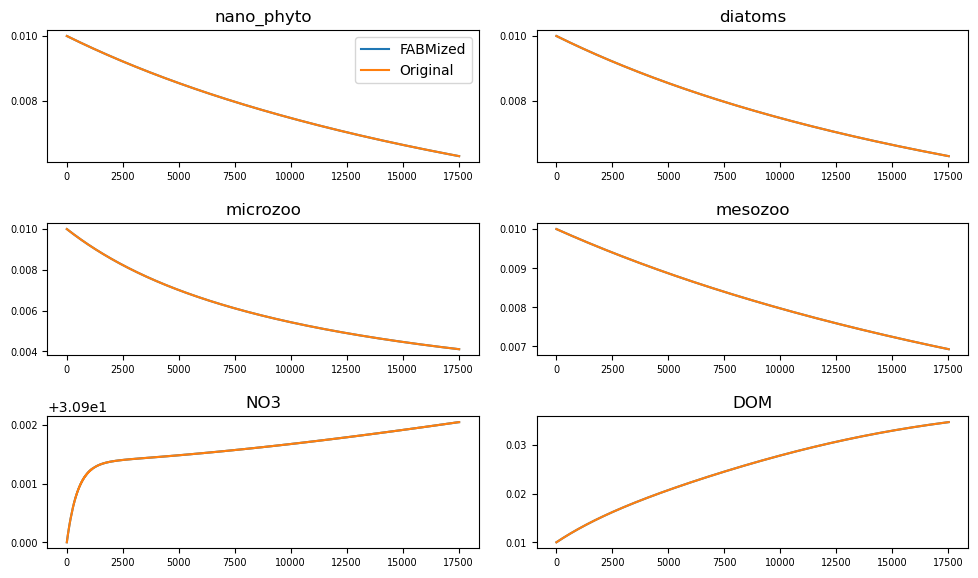

In [10]:
variables1 = ncVars[0:6] #["nano", "dia","zoo", "meso","no3","nh4"]#,"po4","si","fer"]
global anomaly
anomaly = 0
plot_variables(variables1)
if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_1" + prefix + ".png")

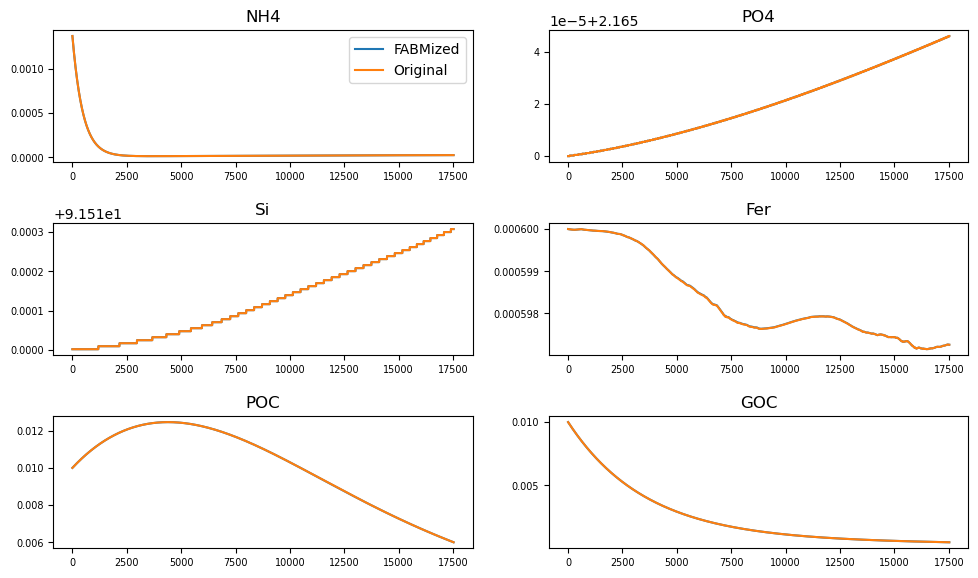

In [11]:
variables2 = ncVars[6:12] #["po4","si","fer","poc","goc"]
plot_variables(variables2)
if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_2" + prefix + ".png")

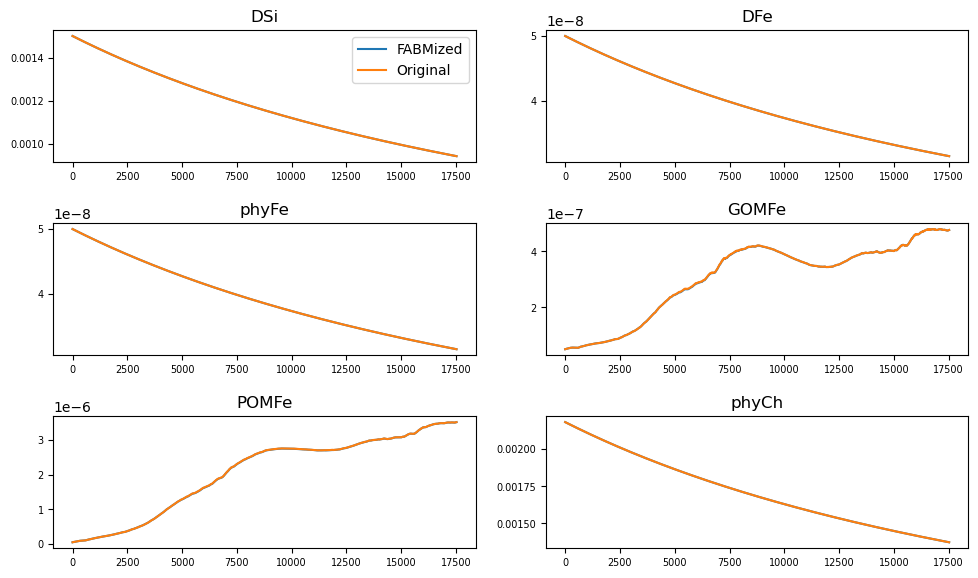

In [12]:
variables3 = ncVars[12:18]
plot_variables(variables3)
if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_3" + prefix + ".png")

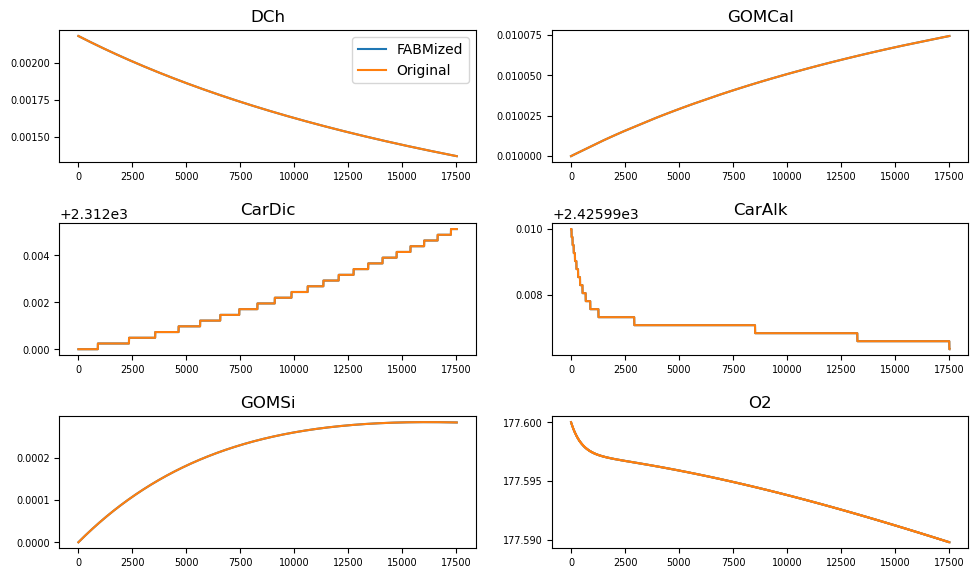

In [13]:
variables4 = ncVars[18:24]
plot_variables(variables4)
if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_4" + prefix + ".png")

In [14]:
variables5 = ncVars[24:]
plot_variables(variables5)
if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_4" + prefix + ".png")

<Figure size 1000x600 with 0 Axes>

In [15]:
print(nano_phyto[365,0], " " , nano_phyto_fabm[365,0])

3.7349412   3.77336


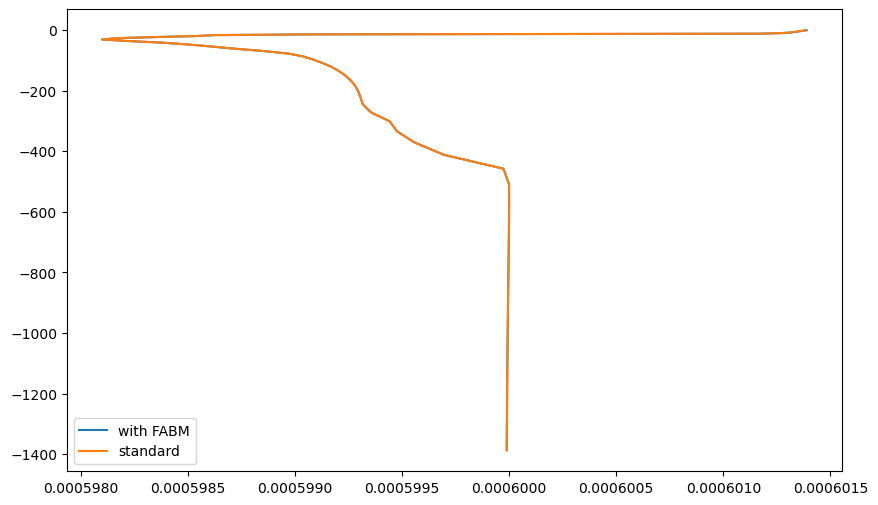

In [16]:
# Vertical profile
var = "Fer"

exec("v_ =" + var + "_fabm[100,0:50]")
exec("v =" + var + "[100,0:50]")


fig = plt.figure(figsize=(10,6))
#fig.add_subplot(2,1,1)
plt.plot(v_,-depth[0:50])
plt.plot(v,-depth[0:50])

plt.legend(["with FABM", "standard"])




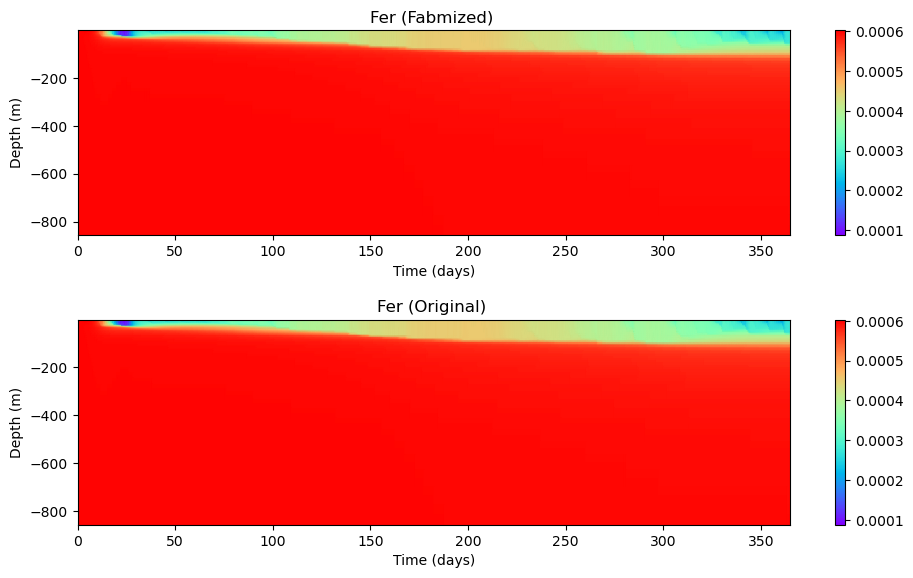

In [17]:
t_step = 1

depth_min = 0
depth_max = 1000

t_ini = 0
t_end = 24*365 

dep_min_id = np.asarray(np.where(depth>=depth_min))[0,0]
dep_max_id = np.asarray(np.where(depth<=depth_max))[0,-1]


fig = plt.figure(figsize=(10,6))
#my_cmap = reverse_colourmap(plt.cm.Spectral)
my_cmap ="rainbow" #"jet"
titre = ["Fabmized", "Original"]

id=0
for flag in flags:
    id+=1  
    exec('Var' + flag + '= np.transpose(' + var + flag + ')')
    exec('vari = Var' + flag + '[dep_min_id:dep_max_id,t_ini:t_end]')
    
    x = np.arange(0,vari.shape[1])*t_step
    [X,dep] = np.meshgrid(x,depth[dep_min_id:dep_max_id])
    
    ax = fig.add_subplot(2,1,id)
    pc = ax.pcolormesh(X/24,-dep,vari,cmap=my_cmap,shading="gouraud")
    clb=fig.colorbar(pc)
    #pc.set_clim(0,0.25)
    #clb.ax.tick_params(labelsize=7)
    plt.title(var  + " (" +  titre[id-1] + ") ", fontsize=12)
    plt.xlabel("Time (days)")
    plt.ylabel("Depth (m)")

# Space between subplots
fig.tight_layout(pad=1.5)

if(save_figs):
    plt.savefig(save_path + "comparison_BGC_variables_GOC" + prefix + ".png")

In [18]:
######### VERTICAL INTEGRATION ################

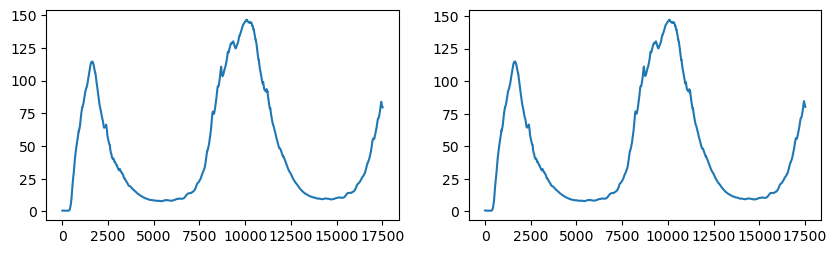

In [19]:
var = "GOC"

exec("v_ =np.sum(" + var + "_fabm,axis = 1)")
exec("v =np.sum(" + var + ",axis = 1)")

fig = plt.figure(figsize=(10,6))
fig.add_subplot(2,2,1)
plt.plot(v_)
fig.add_subplot(2,2,2)
plt.plot(v)
#plt.plot(v,-depth[0:50])



#plt.legend(["with FABM", "standard"])


###########################################################################################################################################
Running time for 1year simulation as a funtion of the number of output diagnostic variables
###########################################################################################################################################

Text(0, 0.5, 'runing time (min)')

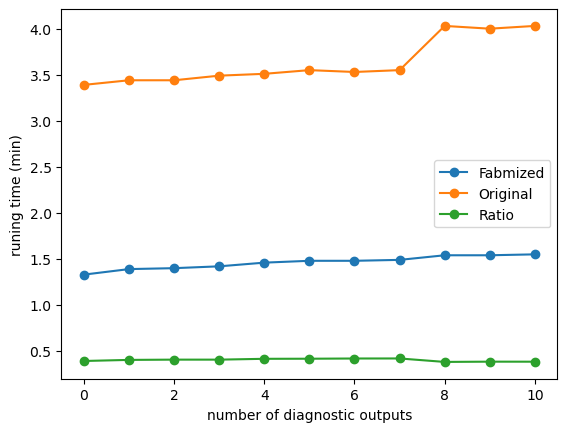

In [20]:
nb_diag_var = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ])
run_time = np.array([3.39, 3.44, 3.44, 3.49, 3.51, 3.55, 3.53, 3.55, 4.03, 4.0, 4.03])
run_time_fabm = np.array([1.33, 1.39, 1.40, 1.42, 1.46, 1.48, 1.48, 1.49, 1.54, 1.54, 1.55 ])

fig = plt.figure()
plt.plot(nb_diag_var,run_time_fabm,'-o')

plt.plot(nb_diag_var,run_time,'-o')

plt.plot(nb_diag_var,run_time_fabm/run_time,'-o')

plt.legend(["Fabmized","Original","Ratio"])
plt.xlabel("number of diagnostic outputs")
plt.ylabel("runing time (min)")

############################### PAR #############################################

In [21]:
filename_par_fabm = "C1D_PAPA_fabm_1ts_20100615_20110614_diad_T.nc"
filename_par = "C1D_PAPA_1ts_20100615_20110614_diad_T.nc"


In [22]:
d_fabm = xr.open_dataset(files_home + "/" + filename_par_fabm).isel(x=1,y=1)
d = xr.open_dataset(files_home + "/" + filename_par).isel(x=1,y=1)

FileNotFoundError: [Errno 2] No such file or directory: '/data/rd_exchange/mbelharet/nemo_4.2_fabm_pisces/ONLINE/C1D_PAPA_fabm_1ts_20100615_20110614_diad_T.nc'

In [ ]:
par_fabm = d_fabm["PAR"].to_numpy()
par = d["PAR"].to_numpy()

In [ ]:
fig = plt.figure();
#ax = fig.add_subplot(1,3,1)

for flag in flags:
        exec("v =" +  "par" + flag + "[:,dep_min_id:dep_max_id]")
        v_mean = np.mean(v,axis=1)
        plt.plot(v_mean[0:240])

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("PAR" , fontsize=12) 
plt.ylabel("$W\ m^{-2}$",fontsize=8)
plt.xlabel("Time (h)",fontsize=8)
plt.legend(["with FABM", "standard"])

"""
day=0
dep_lim = 10
ax = fig.add_subplot(1,3,2)
plt.plot(np.log10(par_fabm[day,0:dep_lim]), -depth[0:dep_lim])
plt.plot(np.log10(par[day,0:dep_lim]), -depth[0:dep_lim])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("PAR" , fontsize=12) 
plt.xlabel("$log_{10}(PAR)$",fontsize=8)
plt.ylabel("Depth (m)",fontsize=8)

Tchl = phyCh + DCh
Tchl_fabm = phyCh_fabm + DCh_fabm

ax = fig.add_subplot(1,3,3)
plt.plot(Tchl_fabm[day,0:dep_lim], -depth[0:dep_lim])
plt.plot(Tchl[day,0:dep_lim], -depth[0:dep_lim])
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("Total Chl" , fontsize=12) 
plt.xlabel("$µmol\ L^{-1}$",fontsize=8)
plt.ylabel("Depth (m)",fontsize=8)




# Space between subplots
fig.tight_layout(pad=1.5)
"""

In [ ]:
######################################### VERTICAL DOFFISION ############################################

In [ ]:
filename_avt_fabm = "C1D_PAPA_fabm_1ts_20100615_20110614_grid_W.nc"
filename_avt = "C1D_PAPA_1ts_20100615_20110614_grid_W.nc"

In [ ]:
d_fabm = xr.open_dataset(files_home + "/" + filename_avt_fabm).isel(x=1,y=1)
d = xr.open_dataset(files_home + "/" + filename_avt).isel(x=1,y=1)


In [ ]:
avt_fabm = d_fabm["votkeavt"].to_numpy()
avt = d["difvho"].to_numpy()

In [ ]:
fig = plt.figure();
#ax = fig.add_subplot(1,3,1)
flags = ["_fabm",""]
for flag in flags:
        exec("v =" +  "avt" + flag + "[:,dep_min_id:dep_max_id]")
        v_mean = np.mean(v,axis=1)
        plt.plot(v_mean[0:240])

plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title("AVT" , fontsize=12) 
#plt.ylabel("$W\ m^{-2}$",fontsize=8)
plt.xlabel("Time (h)",fontsize=8)
plt.legend(["with FABM", "standard"])